# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus componentes principales, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [45]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [64]:
df = pd.read_csv('C:/Users/lydia/OneDrive/Escritorio/Bootcamp/Machine_Learning/2-No_Supervisado/1-PCA/Practica/data/nndb_flat.csv')
df.head()

ID               FoodGroup              ShortDescrip  \
0  1001  Dairy and Egg Products          BUTTER,WITH SALT   
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   

                      Descrip CommonName MfgName ScientificName  Energy_kcal  \
0              Butter, salted        NaN     NaN            NaN        717.0   
1  Butter, whipped, with salt        NaN     NaN            NaN        717.0   
2       Butter oil, anhydrous        NaN     NaN            NaN        876.0   
3                Cheese, blue        NaN     NaN            NaN        353.0   
4               Cheese, brick        NaN     NaN            NaN        371.0   

   Protein_g  Fat_g  ...  Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA  \
0       0.85  81.11  ...        0.0075      0.002625          0.026154   
1       0.85  81.11  ...        0.0075      0.002625          0.026154   
2       0.28  99.48  ...        0.0000      0.000188          0.003846   
3      21.40  28.74  ...        0.0900      0.063500          0.293846   
4      23.24  29.68  ...        0.0500      0.007375          0.270000   

   Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  Magnesium_USRDA  \
0       0.004167       0.020000      0.000000         0.004762   
1       0.004167       0.020000      0.000018         0.004762   
2       0.000833       0.003333      0.000001         0.000000   
3       0.024167       0.440000      0.000044         0.054762   
4       0.011667       0.561667      0.000027         0.057143   

   Phosphorus_USRDA  Selenium_USRDA  Zinc_USRDA  
0          0.034286        0.018182    0.008182  
1          0.032857        0.018182    0.004545  
2          0.004286        0.000000    0.000909  
3          0.552857        0.263636    0.241818  
4          0.644286        0.263636    0.236364  

[5 rows x 45 columns]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [48]:
df.describe()

ID  Energy_kcal   Protein_g        Fat_g       Carb_g  \
count   8618.000000  8618.000000  8618.00000  8618.000000  8618.000000   
mean   15467.757368   226.438617    11.52391    10.647024    21.819062   
std     9221.428766   169.388910    10.55059    15.866353    27.239000   
min     1001.000000     0.000000     0.00000     0.000000     0.000000   
25%     8695.250000    93.000000     2.47000     0.992500     0.040000   
50%    14273.000000   191.000000     8.28500     5.235000     8.945000   
75%    20050.750000   336.000000    19.97750    13.900000    32.900000   
max    93600.000000   902.000000    88.32000   100.000000   100.000000   

           Sugar_g      Fiber_g      VitA_mcg     VitB6_mg   VitB12_mcg  ...  \
count  8618.000000  8618.000000   8618.000000  8618.000000  8618.000000  ...   
mean      6.560253     2.023242     93.968786     0.264369     1.225260  ...   
std      13.602098     4.313670    779.362205     0.478614     4.319183  ...   
min       0.000000     0.000000      0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000      0.000000     0.034250     0.000000  ...   
50%       0.370000     0.300000      1.500000     0.120000     0.080000  ...   
75%       5.300000     2.400000     21.000000     0.355000     1.297500  ...   
max      99.800000    79.000000  30000.000000    12.000000    98.890000  ...   

       Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA  Thiamin_USRDA  \
count   8618.000000   8618.000000       8618.000000    8618.000000   
mean       0.125765      0.213222          0.182499       0.174881   
std        0.466402      0.302161          0.346062       0.431974   
min        0.000000      0.000000          0.000000       0.000000   
25%        0.000000      0.023875          0.035385       0.025000   
50%        0.017500      0.131250          0.115385       0.064583   
75%        0.062500      0.314328          0.200000       0.185833   
max       14.702500      7.968750         13.461538      19.479167   

       Calcium_USRDA  Copper_USRDA  Magnesium_USRDA  Phosphorus_USRDA  \
count    8618.000000   8618.000000      8618.000000       8618.000000   
mean        0.061176      0.000191         0.077965          0.222838   
std         0.167803      0.000615         0.133496          0.290133   
min         0.000000      0.000000         0.000000          0.000000   
25%         0.007500      0.000033         0.023810          0.052857   
50%         0.015833      0.000088         0.047619          0.190000   
75%         0.051667      0.000161         0.069048          0.308571   
max         6.136667      0.016722         1.859524         14.168571   

       Selenium_USRDA   Zinc_USRDA  
count     8618.000000  8618.000000  
mean         0.229363     0.179111  
std          0.514406     0.305292  
min          0.000000     0.000000  
25%          0.001818     0.020909  
50%          0.070909     0.076818  
75%          0.387273     0.245455  
max         34.854545     8.268182  

[8 rows x 39 columns]

### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

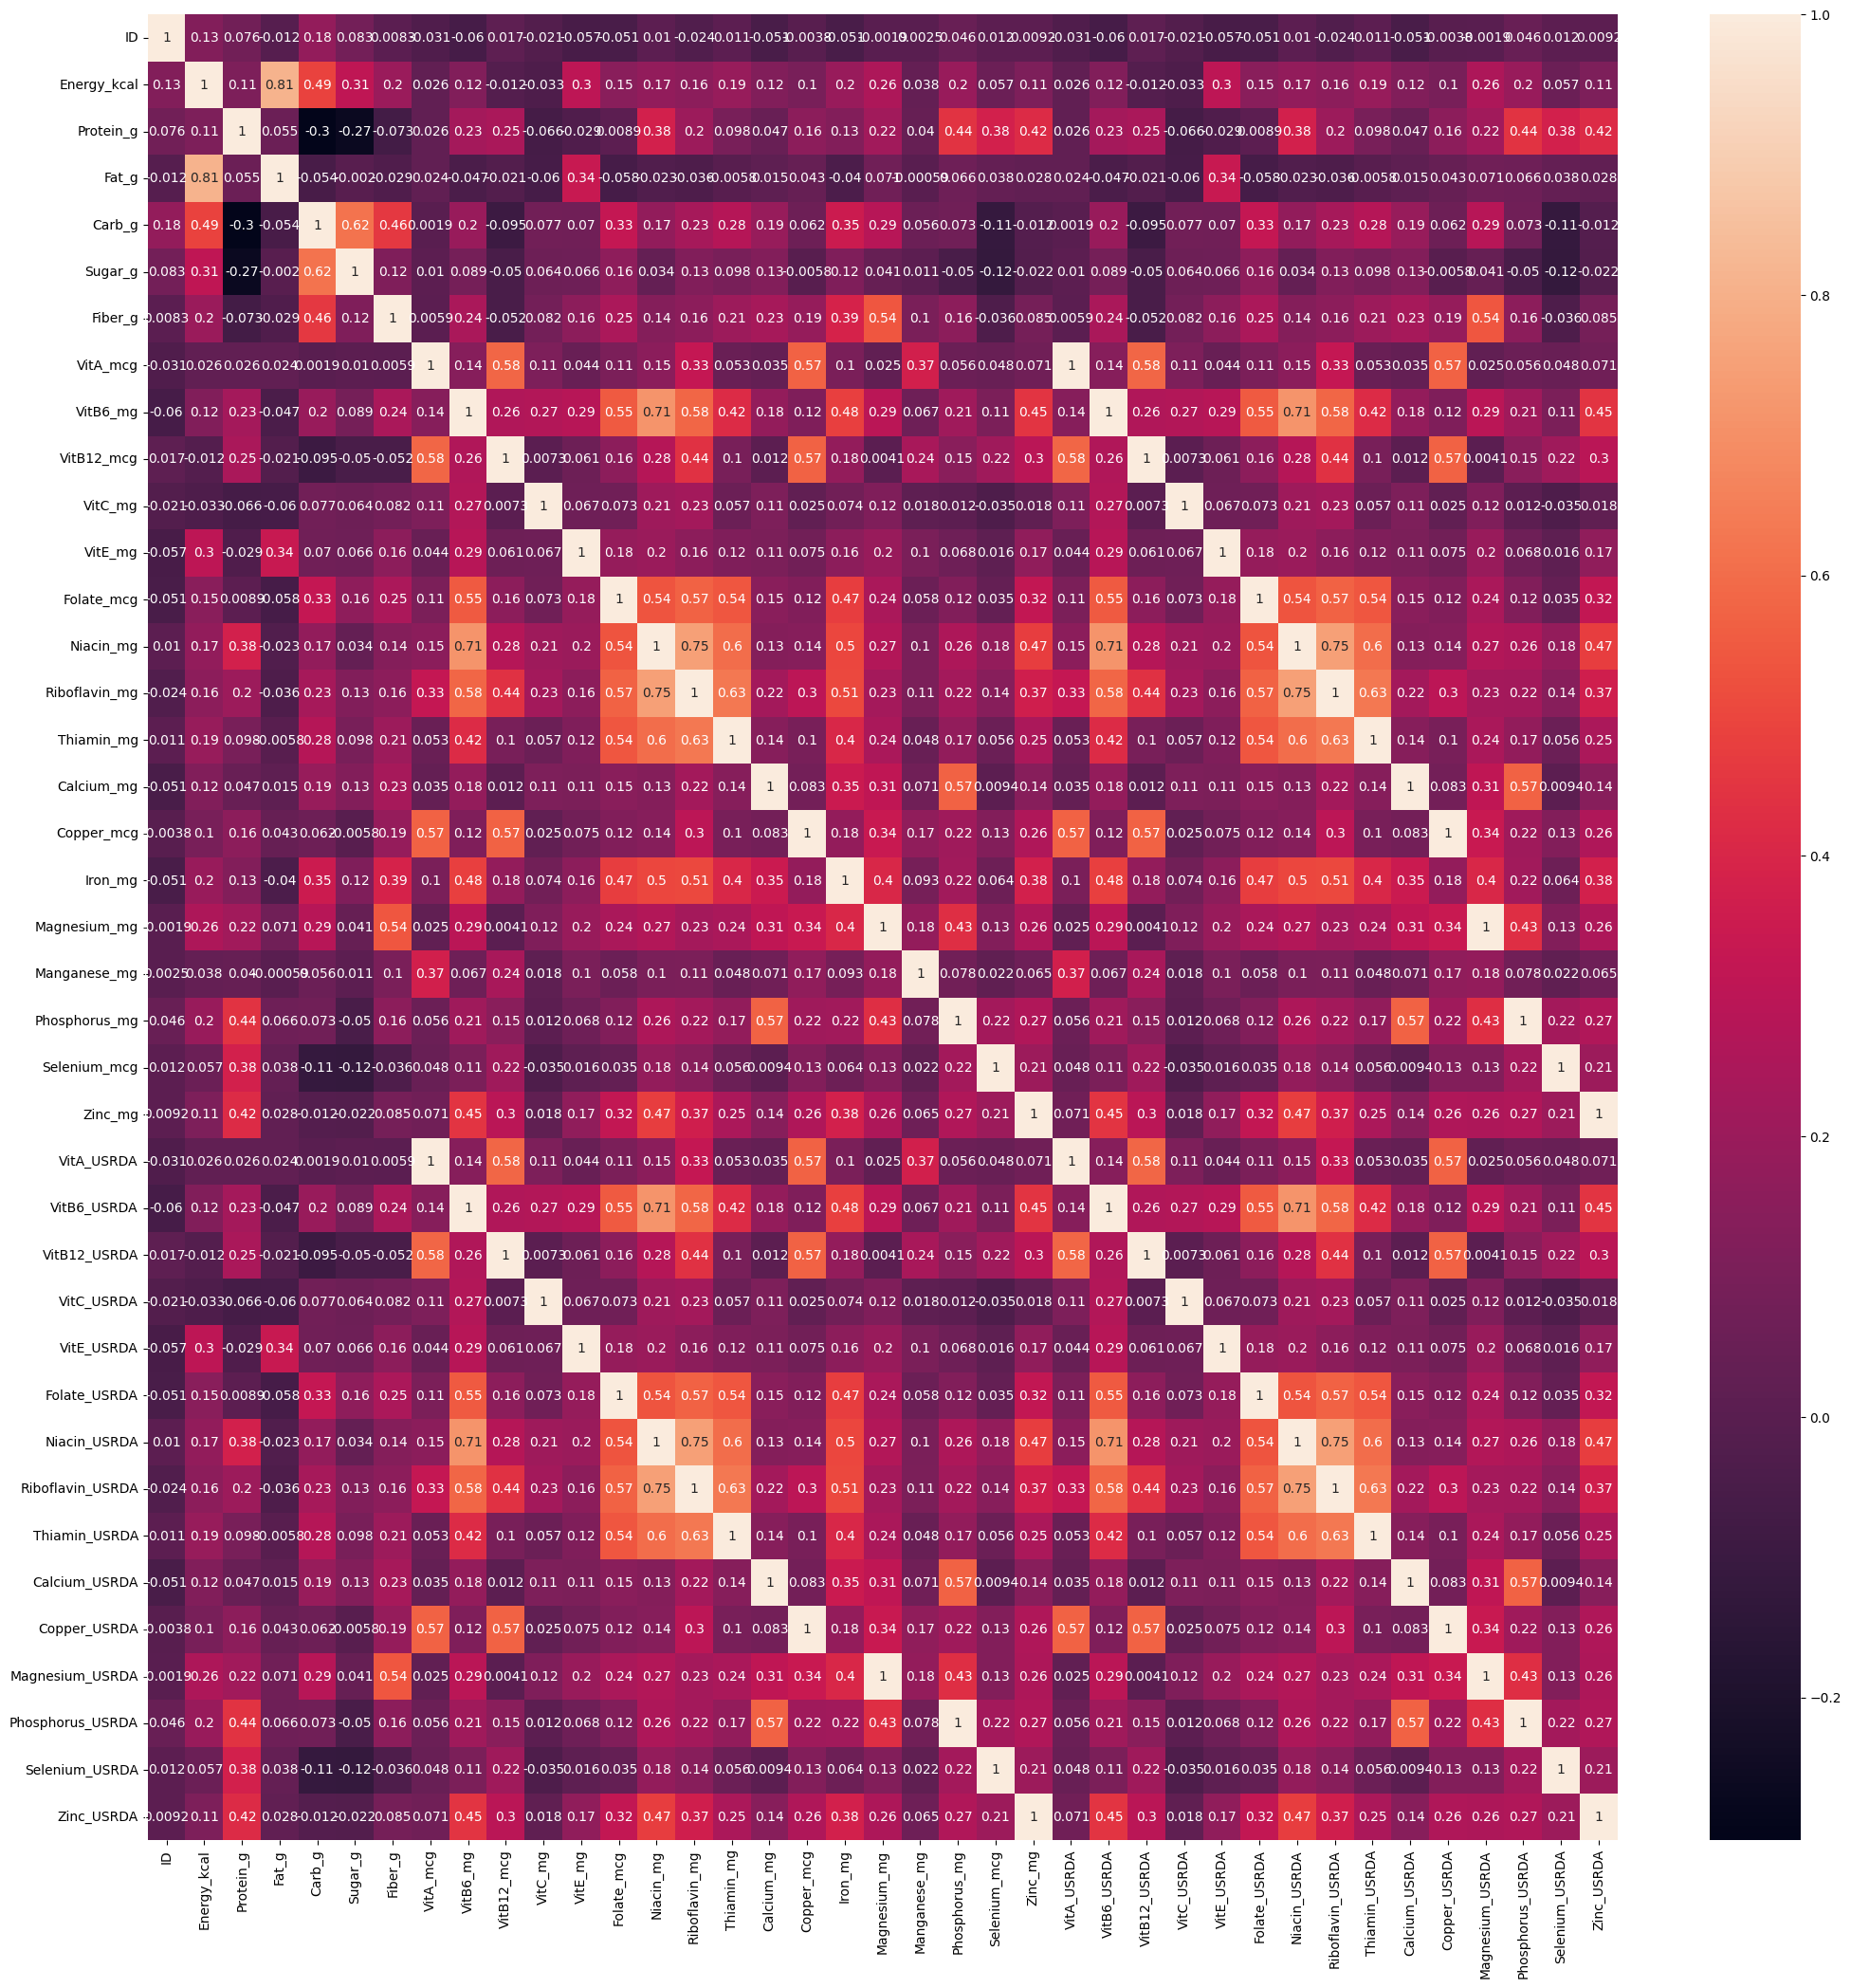

In [49]:
plt.figure(figsize=(25,25))
sns.heatmap(data=df.corr(), annot= True);

Las columnas USRDA tienen una correlación de 1 con sus homónimas mg/mcg. Eliminamos las USRDA y volvemos a graficar el heatmap.

In [50]:
columns_to_drop = [col for col in df.columns if col.endswith('_USRDA')]
df = df.drop(columns_to_drop, axis=1)

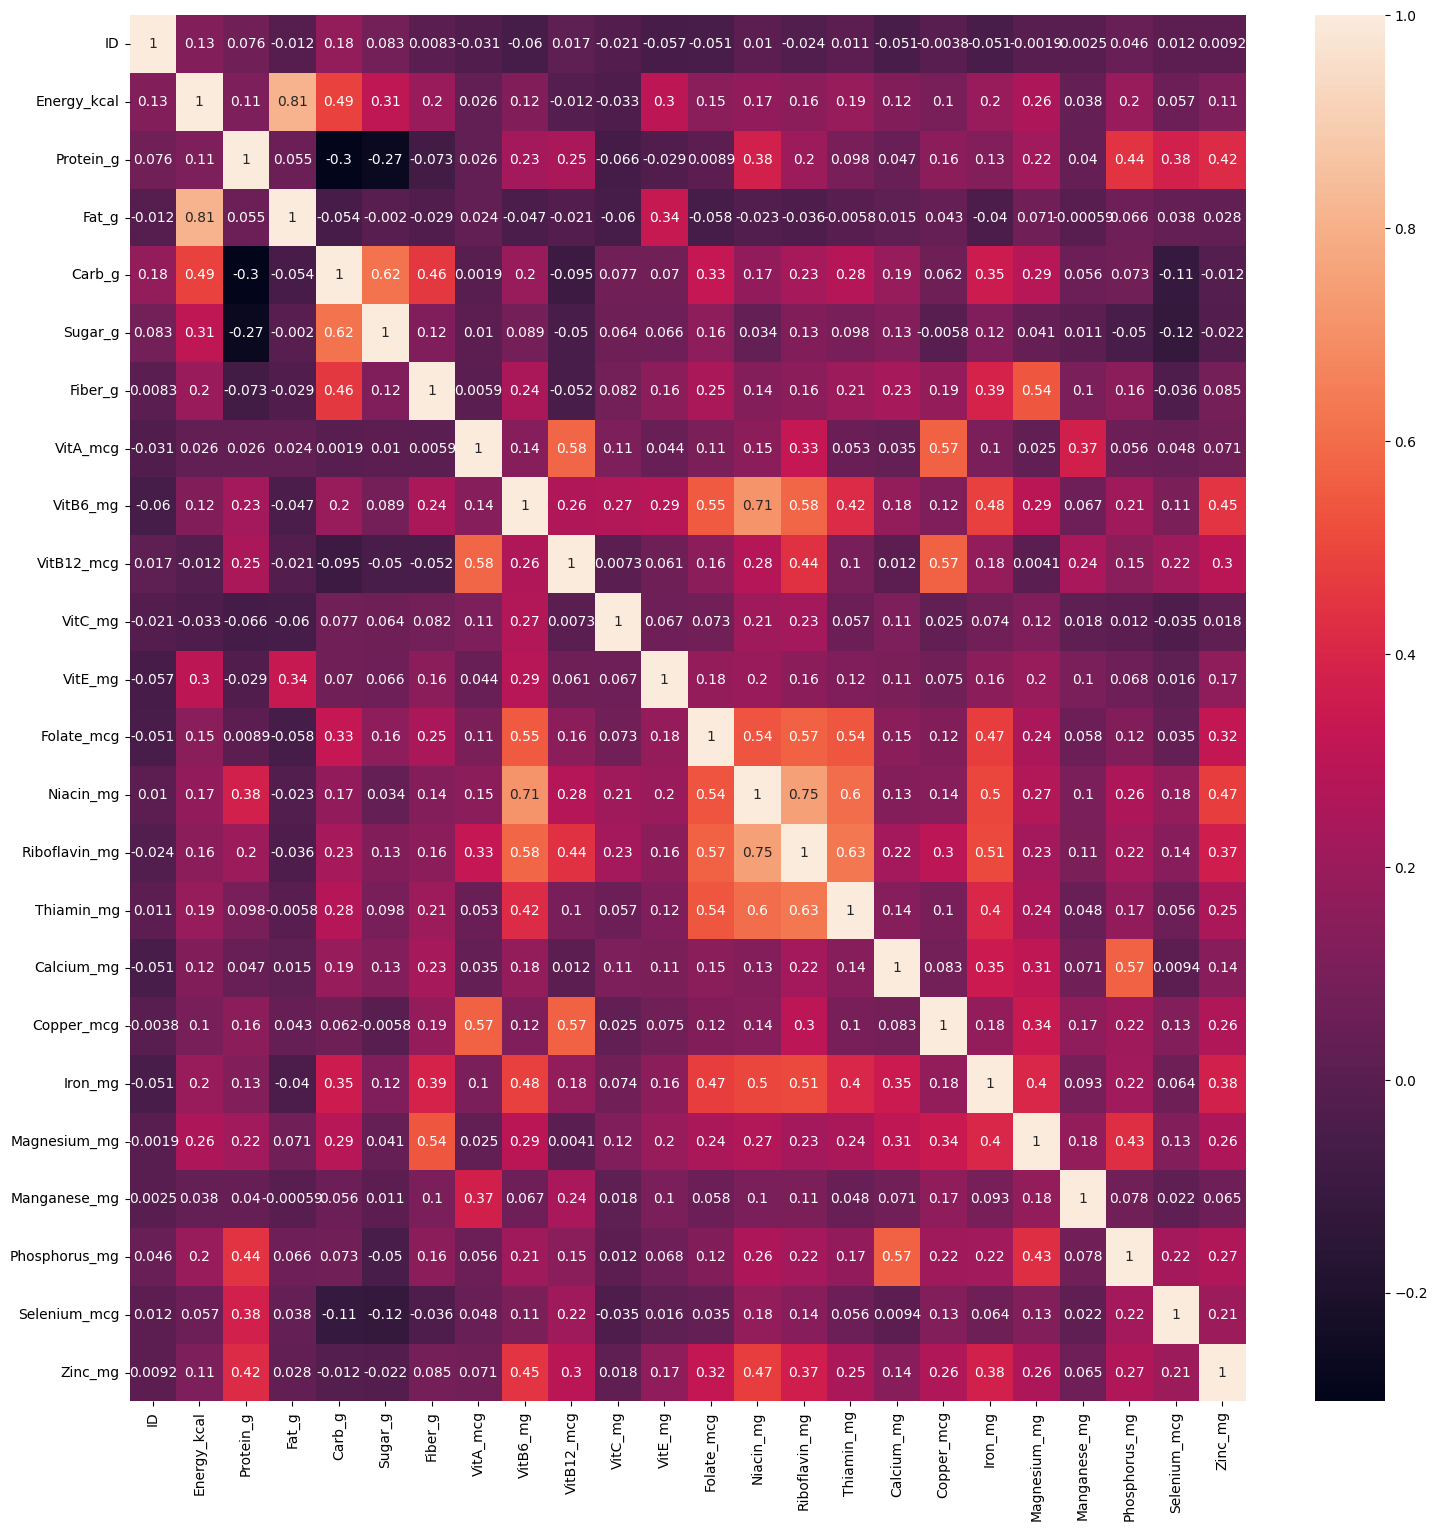

In [51]:
plt.figure(figsize=(18,18))
sns.heatmap(data=df.corr(), annot= True);

Alta correlación en las siguientes columnas:

- Energy_kcal con Fat_g : 0.81
- Niacin_mg con Riboflavin_mg: 0.75
- Niacin_mg con VitB6_mg: 0.75

A tener en cuenta posteriormente para mejorar modelo.

### Variables no numéricas
Elimina las variables de texto del dataset

In [52]:
coltext = df.select_dtypes(include = 'object').columns
df_num = df.drop(coltext, axis=1)

<Figure size 2500x2500 with 0 Axes>

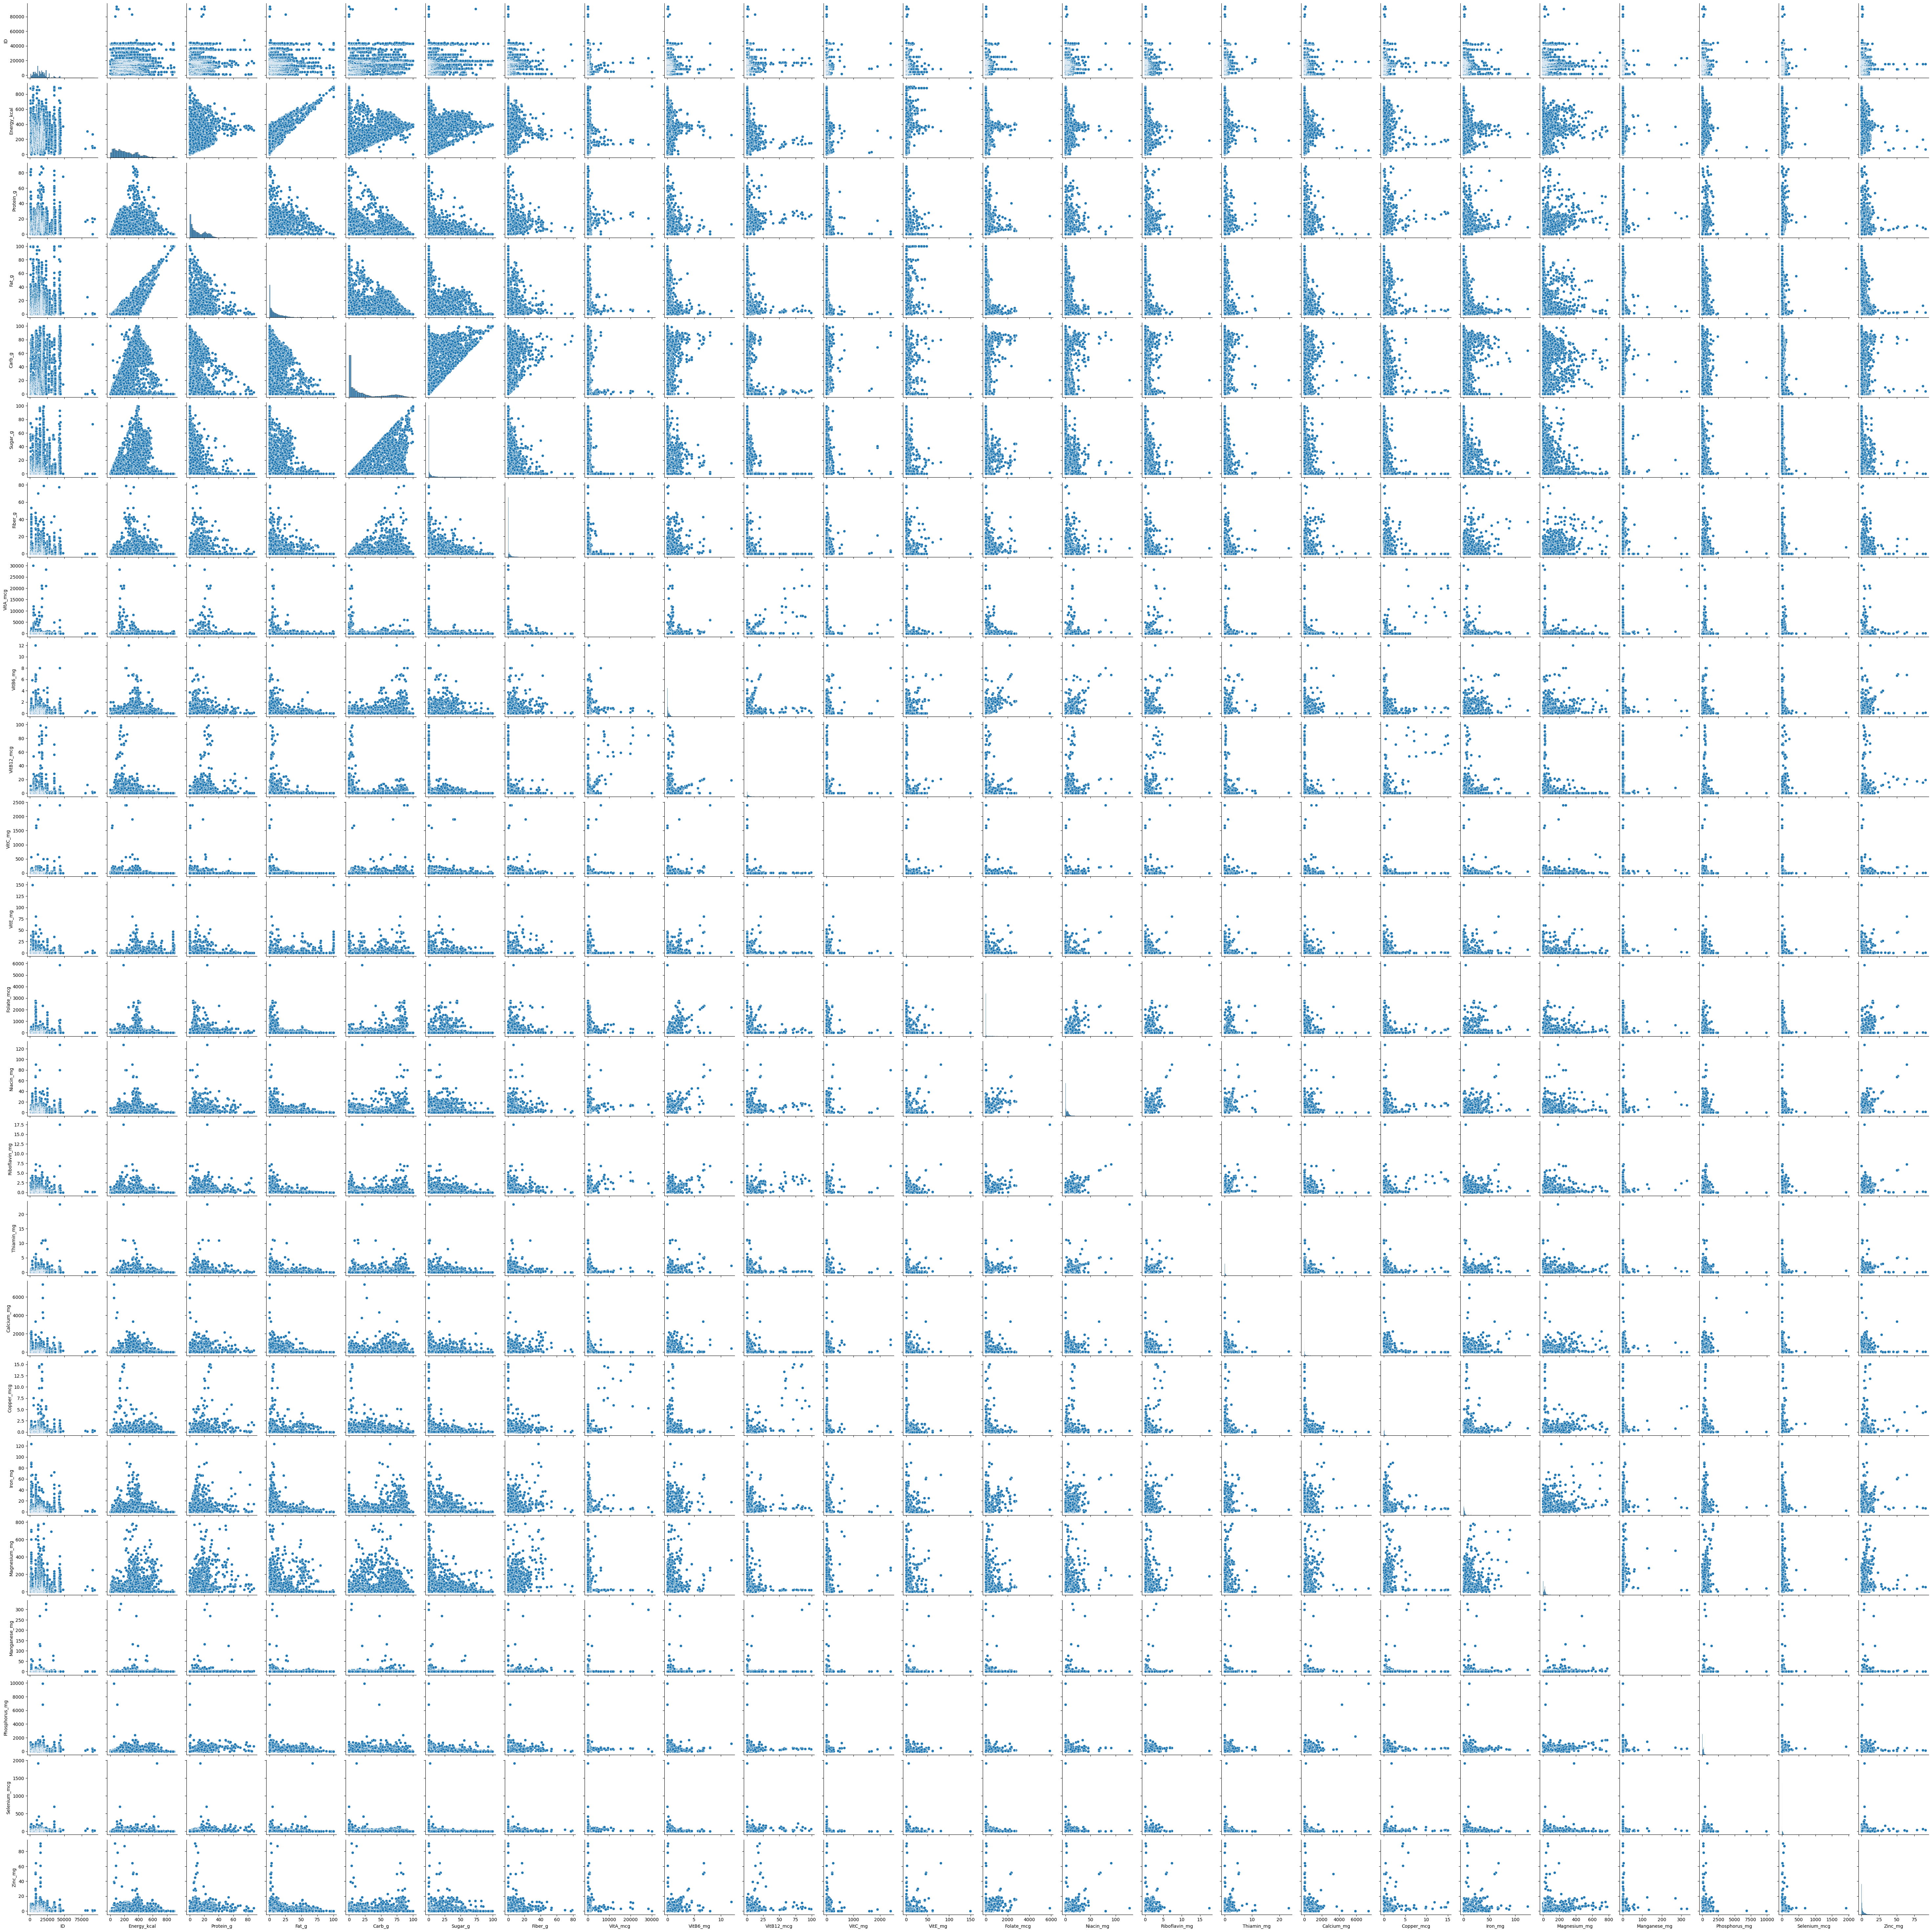

In [9]:
plt.figure(figsize=(25,25))
sns.pairplot(df_num);

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [53]:
# Sumar 1 a los valores del DataFrame para evitar ceros
df_num = df_num + 1

In [33]:
#Transformación logarítmica a todo el dataframe
df_num = np.log(df_num)

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [54]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [55]:
pca = PCA(n_components = 24)

pca.fit(scaled_data)

PCA(n_components=24)

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [56]:
#Varianza explicada
exp_var = pca.explained_variance_ratio_

In [58]:
#Varianza acumulada desde PC1
var_acumulada = np.cumsum(exp_var)
print("Varianza explicada acumulada:")
for i, cum_var in enumerate(var_acumulada):
    print("PC{}: {:.2%}".format(i+1, cum_var))

Varianza explicada acumulada:
PC1: 22.71%
PC2: 33.64%
PC3: 42.13%
PC4: 49.96%
PC5: 56.78%
PC6: 62.06%
PC7: 66.49%
PC8: 70.62%
PC9: 74.35%
PC10: 77.80%
PC11: 81.21%
PC12: 84.15%
PC13: 86.59%
PC14: 88.70%
PC15: 90.65%
PC16: 92.33%
PC17: 93.74%
PC18: 95.08%
PC19: 96.40%
PC20: 97.46%
PC21: 98.45%
PC22: 99.32%
PC23: 99.98%
PC24: 100.00%


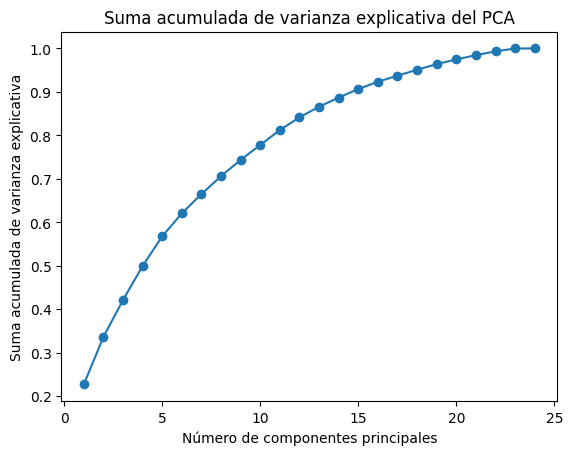

In [59]:
# Diagrama de líneas
plt.plot(range(1, len(var_acumulada) + 1), var_acumulada, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Suma acumulada de varianza explicativa')
plt.title('Suma acumulada de varianza explicativa del PCA')
plt.show();

**Respuesta:** 7 PC

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [60]:
pca1 = PCA(n_components = 7)
pca1.fit(scaled_data)

PCA(n_components=7)

In [65]:
df_red = pd.DataFrame(pca1.transform(scaled_data), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     8618 non-null   float64
 1   PC2     8618 non-null   float64
 2   PC3     8618 non-null   float64
 3   PC4     8618 non-null   float64
 4   PC5     8618 non-null   float64
 5   PC6     8618 non-null   float64
 6   PC7     8618 non-null   float64
dtypes: float64(7)
memory usage: 471.4 KB


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [66]:
#Unimos ambos dataframes
df = df.join(df_red)

In [71]:
#Diccionario vacío para los 3 mejores grupos
top_3 = {}

for pc in range(1, 8):
    # Ordenamos el dataframe reducido por el valor del PC en orden descendente
    sorted_df = df_red.sort_values(f'PC{pc}', ascending=False)
    
    # Obtenemos los índices de los tres grupos de comida con los valores más altos para el PC actual
    top_3_indices = sorted_df.index[:3].tolist()
    
    # Obtenemos los grupos de comida correspondientes en el dataset original
    top_3[pc] = df.loc[top_3_indices, 'FoodGroup'].tolist()

# Imprimimos los grupos de comida correspondientes en el dataset original
for pc, groups in top_3.items():
    print(f"PC{pc}:")
    for group in groups:
        food_group_df = df[df['FoodGroup'] == group]
        print(f"- {group}")
    print()

PC1:
- Vegetables and Vegetable Products
- Breakfast Cereals
- Breakfast Cereals

PC2:
- Beef Products
- Beef Products
- Lamb, Veal, and Game Products

PC3:
- Vegetables and Vegetable Products
- Beverages
- Beverages

PC4:
- Beef Products
- Beef Products
- Lamb, Veal, and Game Products

PC5:
- Baked Products
- Baked Products
- Baked Products

PC6:
- Fats and Oils
- Beverages
- Beverages

PC7:
- Beverages
- Beverages
- Baked Products

